In [1]:
cd ../../Azimuthal Average

[Errno 2] No such file or directory: '../../Azimuthal Average'
/home/maa643/Documents/acousticsCode/qacam/processing


In [6]:
import numpy as np
from rayleighSommerfeld import rayleighsommerfeld as rs
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.animation as animation
import time
#from aziavg import *
from scipy.optimize import curve_fit
from scipy.optimize import root
from scipy.special import*
import math
from scipy import ndimage
import IPython.display as IPdisplay
import glob
from PIL import Image as PIL_Image
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
#import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import*

In [2]:
cd ../Acoustics/Ball

[Errno 2] No such file or directory: '../Acoustics/Ball'
/home/maa643/Documents/acousticsCode/qacam/processing


In [5]:
with open('04.12_8kHz_ball.csv', "r") as txt :
    data = txt.read()
data = data.replace('+-','-')
with open('04.12_8kHz_ball.csv',"w") as txt :
    txt.write(data)
    
with open('04.12_10kHz_ball.csv', "r") as txt :
    data = txt.read()
data = data.replace('+-','-')
with open('04.12_10kHz_ball.csv',"w") as txt :
    txt.write(data)
    
with open('04.12_12kHz_ball.csv', "r") as txt :
    data = txt.read()
data = data.replace('+-','-')
with open('04.12_12kHz_ball.csv',"w") as txt :
    txt.write(data)
    
with open('04.26_13kHz_ball.csv', "r") as txt :
    data = txt.read()
data = data.replace('+-','-')
with open('04.26_13kHz_ball.csv',"w") as txt :
    txt.write(data)

In [6]:
foreground1 = '04.12_8kHz_ball.csv'
foreground2 = '04.12_10kHz_ball.csv'
foreground3 = '04.12_12kHz_ball.csv'
foreground4 = '04.26_13kHz_ball.csv'
background1= '04.12_8kHz_bckgd.csv'
background2= '04.12_10kHz_bckgd.csv'
background3= '04.12_12kHz_bckgd.csv'
background4= '04.26_13kHz_bckgd.csv'

In [7]:
a1 = pd.read_csv(foreground1, header=None)
a1x = a1[2]
a1y = a1[3]
a1amp = a1[4]
a1phi = a1[5]

a2 = pd.read_csv(foreground2, header=None)
a2x = a2[2]
a2y = a2[3]
a2amp = a2[4]
a2phi = a2[5]

a3 = pd.read_csv(foreground3, header=None)
a3x = a3[2]
a3y = a3[3]
a3amp = a3[4]
a3phi = a3[5]

a4 = pd.read_csv(foreground4, header=None)
a4x = a4[2]
a4y = a4[3]
a4amp = a4[4]
a4phi = a4[5]

b1 = pd.read_csv(background1, header=None)
b1x = b1[2]
b1y = b1[3]
b1amp = b1[4]
b1phi = b1[5]

b2 = pd.read_csv(background2, header=None)
b2x = b2[2]
b2y = b2[3]
b2amp = b2[4]
b2phi = b2[5]

b3 = pd.read_csv(background3, header=None)
b3x = b3[2]
b3y = b3[3]
b3amp = b3[4]
b3phi = b3[5]

b4 = pd.read_csv(background4, header=None)
b4x = b4[2]
b4y = b4[3]
b4amp = b4[4]
b4phi = b4[5]

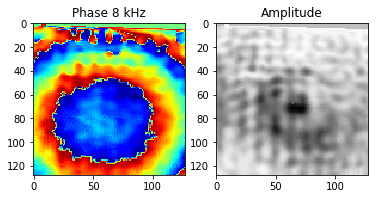

In [8]:
x0 = min(a1x)
x1 = max(a1x)
range = (x1 - x0)/2.
ym = np.mean(a1y) + 0.01
y0 = ym - range
y1 = ym + range
grid_x, grid_y = np.mgrid[x0:x1:128j, y0:y1:128j]
blur = 3
a1xy = np.stack([a1x,a1y]).T
a1da = griddata(a1xy, a1amp, (grid_x, grid_y), fill_value=np.median(a1amp))
a1dp = griddata(a1xy, a1phi, (grid_x, grid_y), fill_value=np.median(a1phi))
a1psi = a1da * np.exp(1.j * a1dp * np.pi / 180.)
plt.subplot(1, 2, 1)
plt.title("Phase 8 kHz")
plt.imshow(a1dp.T, origin='upper',cmap = 'jet')
plt.subplot(1, 2, 2)
plt.title("Amplitude")
plt.imshow(a1da.T, origin='upper', cmap='Greys')

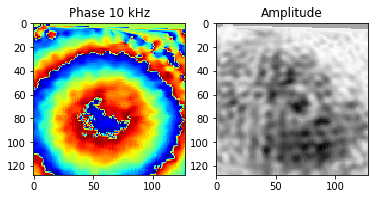

In [9]:
blur = 3
x0 = min(a2x)
x1 = max(a2x)
range = (x1 - x0)/2.
ym = np.mean(a2y) + 0.01
y0 = ym - range
y1 = ym + range
grid_x, grid_y = np.mgrid[x0:x1:128j, y0:y1:128j]
a2xy = np.stack([a2x,a2y]).T
a2da = griddata(a2xy, a2amp, (grid_x, grid_y), fill_value=np.median(a2amp))
a2dp = griddata(a2xy, a2phi, (grid_x, grid_y), fill_value=np.median(a2phi))
a2psi = a2da * np.exp(1.j * a2dp * np.pi / 180.)
plt.subplot(1, 2, 1)
plt.title("Phase 10 kHz")
plt.imshow(a2dp.T, origin='upper',cmap = 'jet')
plt.subplot(1, 2, 2)
plt.title("Amplitude")
plt.imshow(a2da.T, origin='upper', cmap='Greys')

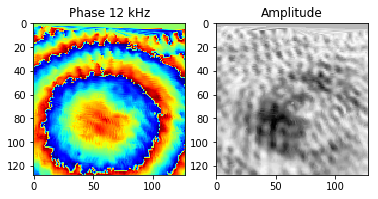

In [10]:
blur = 3
x0 = min(a3x)
x1 = max(a3x)
range = (x1 - x0)/2.
ym = np.mean(a3y) + 0.01
y0 = ym - range
y1 = ym + range
grid_x, grid_y = np.mgrid[x0:x1:128j, y0:y1:128j]
a3xy = np.stack([a3x,a3y]).T
a3da = griddata(a3xy, a3amp, (grid_x, grid_y), fill_value=np.median(a3amp))
a3dp = griddata(a3xy, a3phi, (grid_x, grid_y), fill_value=np.median(a3phi))
a3psi = a3da * np.exp(1.j * a3dp * np.pi / 180.)
plt.subplot(1, 2, 1)
plt.title("Phase 12 kHz")
plt.imshow(a3dp.T, origin='upper',cmap = 'jet')
plt.subplot(1, 2, 2)
plt.title("Amplitude")
plt.imshow(a3da.T, origin='upper', cmap='Greys')

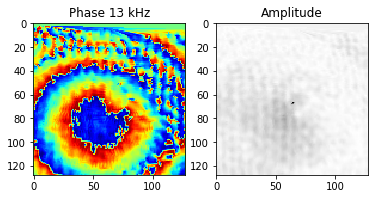

In [11]:
blur = 3
x0 = min(a4x)
x1 = max(a4x)
range = (x1 - x0)/2.
ym = np.mean(a4y) + 0.01
y0 = ym - range
y1 = ym + range
grid_x, grid_y = np.mgrid[x0:x1:128j, y0:y1:128j]
a4xy = np.stack([a4x,a4y]).T
a4da = griddata(a4xy, a4amp, (grid_x, grid_y), fill_value=np.median(a4amp))
a4dp = griddata(a4xy, a4phi, (grid_x, grid_y), fill_value=np.median(a4phi))
a4psi = a4da * np.exp(1.j * a4dp * np.pi / 180.)
plt.subplot(1, 2, 1)
plt.title("Phase 13 kHz")
plt.imshow(a4dp.T, origin='upper',cmap = 'jet')
plt.subplot(1, 2, 2)
plt.title("Amplitude")
plt.imshow(a4da.T, origin='upper', cmap='Greys')

In [12]:
blur = 3
x0 = min(b4x)
x1 = max(b4x)
range = (x1 - x0)/2.
ym = np.mean(b4y) + 0.01
y0 = ym - range
y1 = ym + range
grid_x, grid_y = np.mgrid[x0:x1:128j, y0:y1:128j]
b4xy = np.stack([b4x,b4y]).T
b4da = griddata(b4xy, b4amp, (grid_x, grid_y), fill_value=np.median(b4amp))
b4dp = griddata(b4xy, b4phi, (grid_x, grid_y), fill_value=np.median(b4phi))
b4psi = b4da * np.exp(1.j * b4dp * np.pi / 180.)

In [13]:
blur = 3
x0 = min(b3x)
x1 = max(b3x)
range = (x1 - x0)/2.
ym = np.mean(b3y) + 0.01
y0 = ym - range
y1 = ym + range
grid_x, grid_y = np.mgrid[x0:x1:128j, y0:y1:128j]
b3xy = np.stack([b3x,b3y]).T
b3da = griddata(b3xy, b3amp, (grid_x, grid_y), fill_value=np.median(b3amp))
b3dp = griddata(b3xy, b3phi, (grid_x, grid_y), fill_value=np.median(b3phi))
b3psi = b3da * np.exp(1.j * b3dp * np.pi / 180.)

In [14]:
blur = 3
x0 = min(b2x)
x1 = max(b2x)
range = (x1 - x0)/2.
ym = np.mean(b2y) + 0.01
y0 = ym - range
y1 = ym + range
grid_x, grid_y = np.mgrid[x0:x1:128j, y0:y1:128j]
b2xy = np.stack([b2x,b2y]).T
b2da = griddata(b2xy, b2amp, (grid_x, grid_y), fill_value=np.median(b2amp))
b2dp = griddata(b2xy, b2phi, (grid_x, grid_y), fill_value=np.median(b2phi))
b2psi = b2da * np.exp(1.j * b2dp * np.pi / 180.)

In [15]:
blur = 3
x0 = min(b1x)
x1 = max(b1x)
range = (x1 - x0)/2.
ym = np.mean(b1y) + 0.01
y0 = ym - range
y1 = ym + range
grid_x, grid_y = np.mgrid[x0:x1:128j, y0:y1:128j]
b1xy = np.stack([b1x,b1y]).T
b1da = griddata(b1xy, b1amp, (grid_x, grid_y), fill_value=np.median(b1amp))
b1dp = griddata(b1xy, b1phi, (grid_x, grid_y), fill_value=np.median(b1phi))
b1psi = b1da * np.exp(1.j * b1dp * np.pi / 180.)

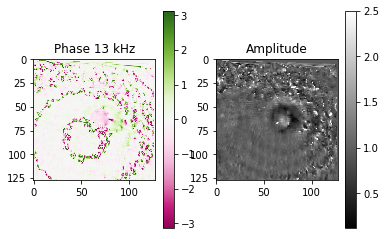

In [16]:
norm4 = (a4psi)/ b4psi
plt.subplot(1, 2, 1)
plt.title("Phase 13 kHz")
plt.imshow(np.angle(norm4).T, origin='upper',cmap = 'PiYG')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Amplitude")
plt.imshow(np.clip(np.abs(norm4).T, 0, 2.5), origin='upper', cmap='gray')
plt.colorbar()

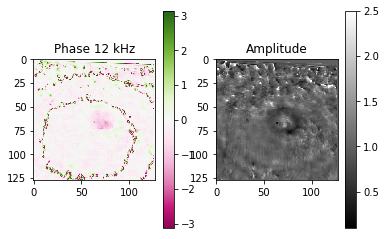

In [17]:
norm3 = (a3psi)/ b3psi
plt.subplot(1, 2, 1)
plt.title("Phase 12 kHz")
plt.imshow(np.angle(norm3).T, origin='upper',cmap = 'PiYG')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Amplitude")
plt.imshow(np.clip(np.abs(norm3).T, 0, 2.5), origin='upper', cmap='gray')
plt.colorbar()

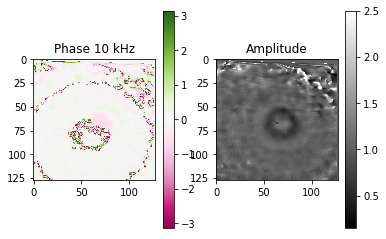

In [18]:
norm2 = (a2psi)/ b2psi
plt.subplot(1, 2, 1)
plt.title("Phase 10 kHz")
plt.imshow(np.angle(norm2).T, origin='upper',cmap = 'PiYG')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Amplitude")
plt.imshow(np.clip(np.abs(norm2).T, 0, 2.5), origin='upper', cmap='gray')
plt.colorbar()

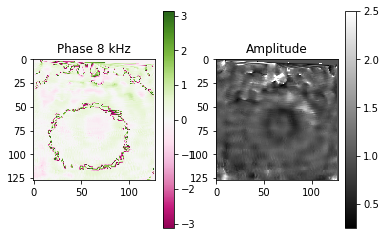

In [19]:
norm1= (a1psi)/ b1psi
plt.subplot(1, 2, 1)
plt.title("Phase 8 kHz")
plt.imshow(np.angle(norm1).T, origin='upper',cmap = 'PiYG')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Amplitude")
plt.imshow(np.clip(np.abs(norm1).T, 0, 2.5), origin='upper', cmap='gray')
plt.colorbar()

In [279]:
norm2=np.reshape(norm2,(128,128))
phase=np.angle(norm2)-(3*np.pi)
phase=ndimage.median_filter(phase,4)
amplitude=np.absolute(norm2)
amplitude=amplitude/np.mean(amplitude)

pressure=(amplitude*np.exp(1j*(phase)))-1
pressure=np.reshape(pressure,(128,128))

lamb = 0.02638 # [m]
mpp = 0.004885 # [m] (? could be 0.007)
z= 128

list_3d_field_2 = []
list_3d_amplitude_2 = []
list_3d_phase_2 = []

for i in np.arange (0,z,1):
    z_val = float(i)
    
    reconstructed_field = rs(norm2, z_val, lamb,mpp,nozphase='True')
    reconstructed_amplitude = np.absolute(reconstructed_field)
    reconstructed_amplitude = reconstructed_amplitude.reshape(128,128)
    reconstructed_phase = np.angle(reconstructed_field)
    reconstructed_phase = reconstructed_phase.reshape(128,128)
    list_3d_field_2.append(reconstructed_field)
    list_3d_amplitude_2.append(reconstructed_amplitude)
    list_3d_phase_2.append(reconstructed_phase)
    
array_3d_field_2 = np.asarray(list_3d_field_2)
array_3d_amplitude_2 = np.asarray(list_3d_amplitude_2)
array_3d_phase_2 = np.asarray(list_3d_phase_2)

print np.shape(array_3d_amplitude_2)

(128, 128, 128)


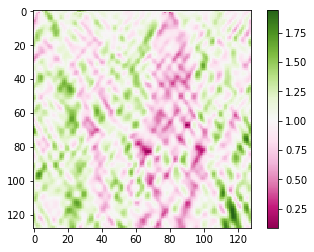

In [284]:
np.shape(array_3d_amplitude_2)
plt.imshow(array_3d_amplitude_2[:,37,:], cmap='PiYG')
plt.colorbar()

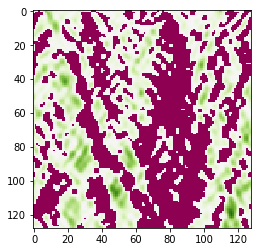

In [285]:
norm2_slice= array_3d_amplitude_2[:,35,:]
thresh= norm2_slice < 1.0
norm2_slice[thresh] = 0
plt.imshow(norm2_slice,cmap='PiYG')

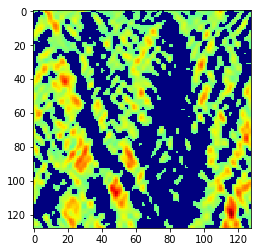

In [286]:
plt.imshow(norm2_slice,cmap='jet')

In [210]:
norm1=np.reshape(norm1,(128,128))
phase=np.angle(norm1)-(3*np.pi)
phase=ndimage.median_filter(phase,4)
amplitude=np.absolute(norm1)
amplitude=amplitude/np.mean(amplitude)

pressure=(amplitude*np.exp(1j*(phase)))-1
pressure=np.reshape(pressure,(128,128))

lamb = 0.02638 # [m]
mpp = 0.004885 # [m] (? could be 0.007)
z= 128

list_3d_field_1 = []
list_3d_amplitude_1 = []
list_3d_phase_1 = []

for i in np.arange (0,z,1):
    z_val = float(i)
    
    reconstructed_field = rs(norm1, z_val, lamb,mpp,nozphase='True')
    reconstructed_amplitude = np.absolute(reconstructed_field)
    reconstructed_amplitude = reconstructed_amplitude.reshape(128,128)
    reconstructed_phase = np.angle(reconstructed_field)
    reconstructed_phase = reconstructed_phase.reshape(128,128)
    list_3d_field_1.append(reconstructed_field)
    list_3d_amplitude_1.append(reconstructed_amplitude)
    list_3d_phase_1.append(reconstructed_phase)
    
array_3d_field_1 = np.asarray(list_3d_field_1)
array_3d_amplitude_1 = np.asarray(list_3d_amplitude_1)
array_3d_phase_1 = np.asarray(list_3d_phase_1)

print np.shape(array_3d_amplitude_1)

(128, 128, 128)


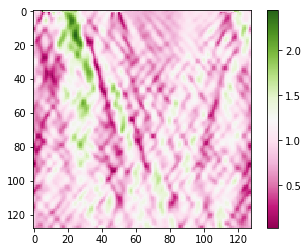

In [211]:
np.shape(array_3d_amplitude_1)
plt.imshow(array_3d_amplitude_1[:,55,:], cmap='PiYG')
plt.colorbar()

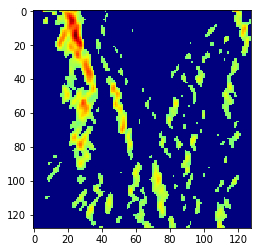

In [212]:
norm1_slice= array_3d_amplitude_1[:,55,:]
thresh= norm1_slice < 1.20 
norm1_slice[thresh] = 0
plt.imshow(norm1_slice,cmap='jet')

In [167]:
norm3=np.reshape(norm3,(128,128))
phase=np.angle(norm3)-(3*np.pi)
phase=ndimage.median_filter(phase,4)
amplitude=np.absolute(norm3)
amplitude=amplitude/np.mean(amplitude)

pressure=(amplitude*np.exp(1j*(phase)))-1
pressure=np.reshape(pressure,(128,128))

lamb = 0.02638 # [m]
mpp = 0.004885 # [m] (? could be 0.007)
z= 128

list_3d_field_3 = []
list_3d_amplitude_3 = []
list_3d_phase_3 = []

for i in np.arange (0,z,1):
    z_val = float(i)
    
    reconstructed_field = rs(norm3, z_val, lamb,mpp,nozphase='True')
    reconstructed_amplitude = np.absolute(reconstructed_field)
    reconstructed_amplitude = reconstructed_amplitude.reshape(128,128)
    reconstructed_phase = np.angle(reconstructed_field)
    reconstructed_phase = reconstructed_phase.reshape(128,128)
    list_3d_field_3.append(reconstructed_field)
    list_3d_amplitude_3.append(reconstructed_amplitude)
    list_3d_phase_3.append(reconstructed_phase)
    
array_3d_field_3 = np.asarray(list_3d_field_3)
array_3d_amplitude_3 = np.asarray(list_3d_amplitude_3)
array_3d_phase_3 = np.asarray(list_3d_phase_3)

print np.shape(array_3d_amplitude_3)

(128, 128, 128)


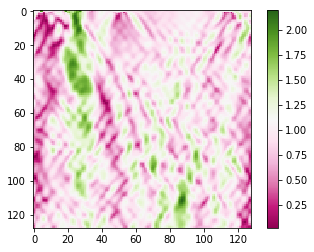

In [168]:
np.shape(array_3d_amplitude_1)
plt.imshow(array_3d_amplitude_1[:,50,:], cmap='PiYG')
plt.colorbar()

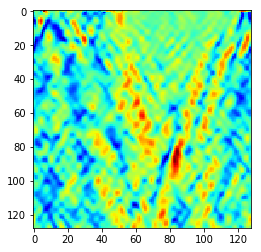

In [169]:
norm3_slice= array_3d_amplitude_3[:,50,:]
thresh= norm3_slice < 1.20 
norm1_slice[thresh] = 0
plt.imshow(norm3_slice,cmap='jet')

In [170]:
norm4=np.reshape(norm4,(128,128))
phase=np.angle(norm4)-(3*np.pi)
phase=ndimage.median_filter(phase,4)
amplitude=np.absolute(norm4)
amplitude=amplitude/np.mean(amplitude)

pressure=(amplitude*np.exp(1j*(phase)))-1
pressure=np.reshape(pressure,(128,128))

lamb = 0.02638 # [m]
mpp = 0.004885 # [m] (? could be 0.007)
z= 128

list_3d_field_4 = []
list_3d_amplitude_4 = []
list_3d_phase_4 = []

for i in np.arange (0,z,1):
    z_val = float(i)
    
    reconstructed_field = rs(norm4, z_val, lamb,mpp,nozphase='True')
    reconstructed_amplitude = np.absolute(reconstructed_field)
    reconstructed_amplitude = reconstructed_amplitude.reshape(128,128)
    reconstructed_phase = np.angle(reconstructed_field)
    reconstructed_phase = reconstructed_phase.reshape(128,128)
    list_3d_field_4.append(reconstructed_field)
    list_3d_amplitude_4.append(reconstructed_amplitude)
    list_3d_phase_4.append(reconstructed_phase)
    
array_3d_field_4 = np.asarray(list_3d_field_4)
array_3d_amplitude_4 = np.asarray(list_3d_amplitude_4)
array_3d_phase_4 = np.asarray(list_3d_phase_4)

print np.shape(array_3d_amplitude_4)

(128, 128, 128)


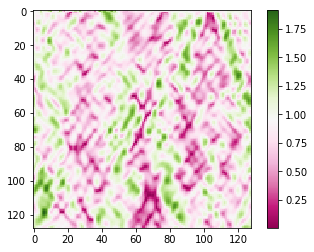

In [180]:
np.shape(array_3d_amplitude_4)
plt.imshow(array_3d_amplitude_4[:,62,:], cmap='PiYG')
plt.colorbar()

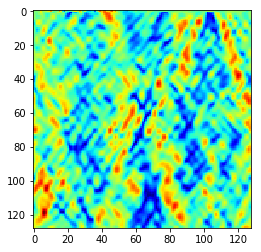

In [181]:
norm4_slice= array_3d_amplitude_4[:,62,:]
thresh= norm4_slice < 1.00 
norm1_slice[thresh] = 0
plt.imshow(norm4_slice,cmap='jet')

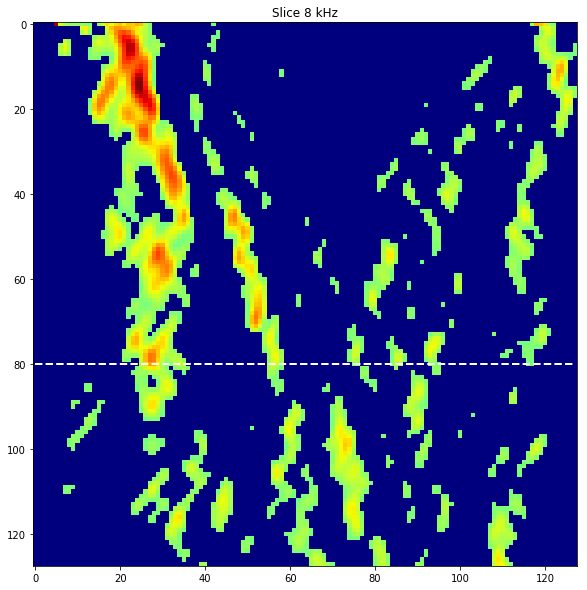

In [239]:
plt.figure(figsize=(10,10))
fig.tight_layout()
plt.subplot(1, 1, 1)
plt.title("Slice 8 kHz")
plt.imshow(norm1_slice, origin='upper',cmap = 'jet')
plt.plot([0,127],[80,80],'w',linestyle='--', linewidth=2)
plt.show()

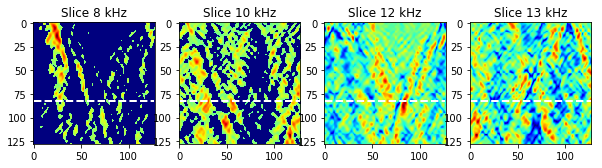

In [287]:
#fig,axes= plt.subplots(4,4)
plt.figure(figsize=(10,10))
fig.tight_layout()
plt.subplot(1, 4, 1)
plt.title("Slice 8 kHz")
plt.imshow(norm1_slice, origin='upper',cmap = 'jet')
plt.plot([0,127],[82,82],'w',linestyle='--', linewidth=2)
plt.subplot(1, 4, 2)
plt.title("Slice 10 kHz")
plt.imshow(norm2_slice, origin='upper',cmap = 'jet')
plt.plot([0,127],[82,82],'w',linestyle='--', linewidth=2)
plt.subplot(1, 4, 3)
plt.title("Slice 12 kHz")
plt.imshow(norm3_slice, origin='upper',cmap = 'jet')
plt.plot([0,127],[82,82],'w',linestyle='--', linewidth=2)
plt.subplot(1, 4, 4)
plt.title("Slice 13 kHz")
plt.imshow(norm4_slice, origin='upper',cmap = 'jet')
plt.plot([0,127],[82,82],'w',linestyle='--', linewidth=2)
plt.show()